# Etiquetado de objetos

In [150]:
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import dilation, erosion
import numpy as np
from skimage.measure import label

In [151]:
sic_image = cv2.imread('images/sic.png', cv2.IMREAD_GRAYSCALE)

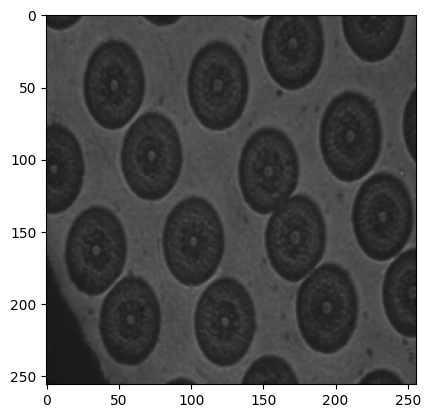

In [152]:
plt.imshow(sic_image, cmap='gray', vmin=0, vmax=255)

In [153]:
thres_value, thres_image = cv2.threshold(sic_image, 70, 255,cv2.THRESH_BINARY)
negative = cv2.bitwise_not(thres_image)

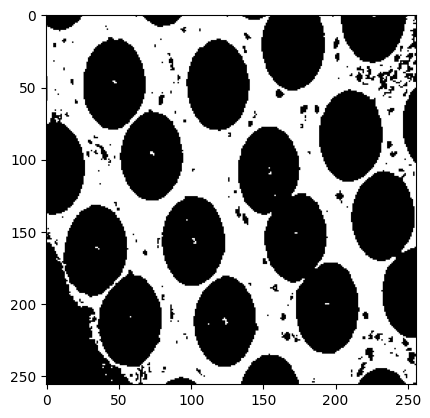

In [154]:
plt.imshow(thres_image, cmap='gray', vmin=0, vmax=255)

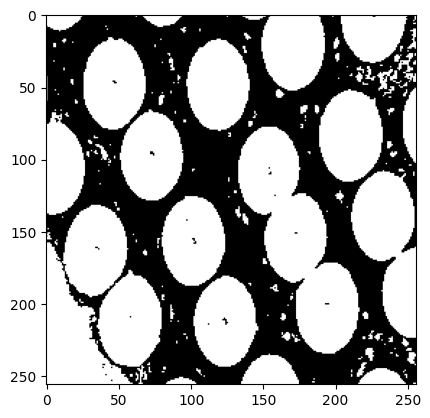

In [155]:
plt.imshow(negative, cmap='gray', vmin=0, vmax=255)

In [156]:
cross_mask = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
dilated = dilation(thres_image, footprint=[(cross_mask,6)])


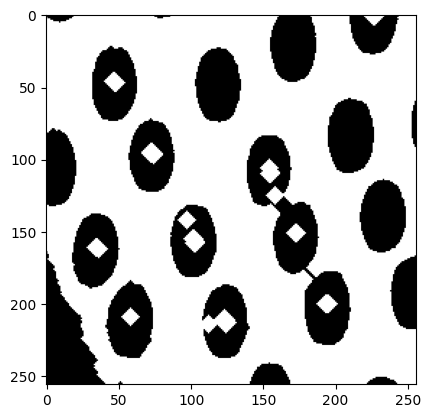

In [157]:
plt.imshow(dilated, cmap='gray', vmin=0, vmax=255)

In [158]:
mascara_ortogonal = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=np.uint8)
linea_obliqua = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]], dtype=np.uint8)

erosion_image = erosion(sic_image, footprint=[(linea_obliqua , 10), (mascara_ortogonal, 6)])

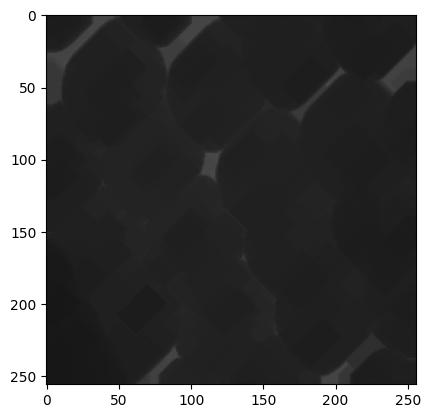

In [159]:
plt.imshow(erosion_image, cmap='gray', vmin=0, vmax=255)

In [160]:
connected_components_1 = label(dilated,background=0, connectivity=2)

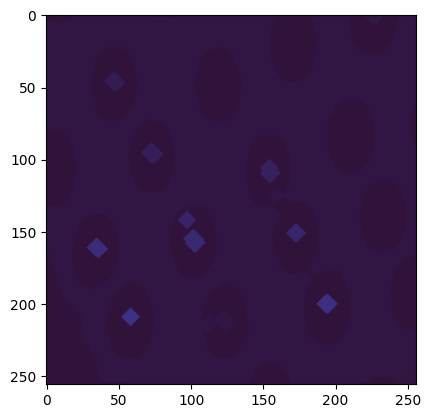

In [161]:
plt.imshow(connected_components_1, cmap='turbo', vmin=0, vmax=255)

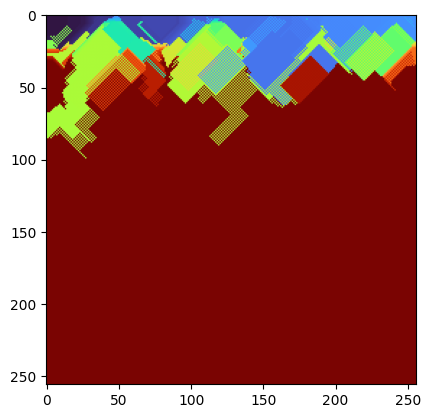

In [162]:
connected_components_2 = label(erosion_image,background=0, connectivity=2)
plt.imshow(connected_components_2, cmap='turbo', vmin=0, vmax=255)

## ¿Qué ocurre con el borde?